In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('mako', 4)
sns.set_style('darkgrid')

In [2]:
kepler_df = pd.read_csv('cumulative.csv')
kepler_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
kepler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [4]:
kepler_df.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [5]:
kepler_df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

### **Data Pre-processing and EDA**

In [6]:
kepler_df['koi_disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

Text(0.5, 1.0, 'Count of Planets by Disposition')

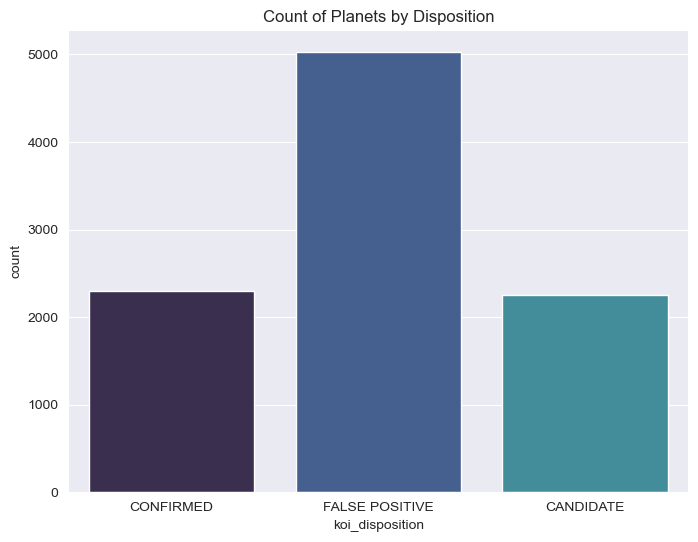

In [7]:
# Plotting the count of each disposition
plt.figure(figsize = (8,6))
sns.countplot(x = 'koi_disposition', data = kepler_df)
plt.title('Count of Planets by Disposition')

Text(0.5, 1.0, 'Count of Planets by Disposition')

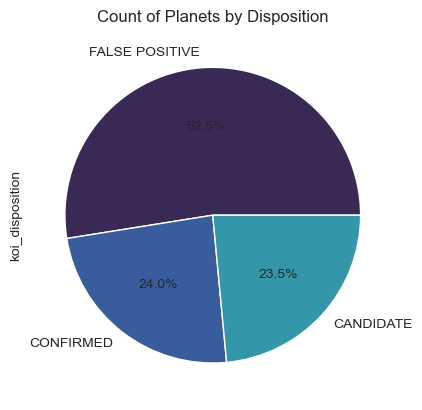

In [8]:
kepler_df['koi_disposition'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Count of Planets by Disposition')

 **The findings above indicate that, the data can be either over or under sampled for a slight boost in performance of the models.**

In [9]:
# Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
kepler_df['koi_disposition'] = le.fit_transform(kepler_df['koi_disposition'])

In [10]:
# Dropping unnecessary columns
kepler_df.drop(['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname'], axis = 1, inplace = True)

In [11]:
# Dropping columns with more than 50% missing values
kepler_df.dropna(axis = 1, thresh = kepler_df.shape[0]*0.5, inplace = True)

In [12]:
# Dropping rows with missing values
kepler_df.dropna(axis = 0, inplace = True)

In [13]:
kepler_df.reset_index(drop = True, inplace = True)
kepler_df

,rowid,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,1,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,1,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,2,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,2,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,1,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,9560,2,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
7799,9561,2,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
7800,9562,0,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
7801,9563,2,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [14]:
# Setting x and y variables
X = kepler_df.drop(['koi_disposition', 'koi_pdisposition', 'rowid', 'koi_score'], axis=1)
y = kepler_df['koi_disposition']

In [15]:
# Getting pearson coefficient for all features against the target
corr = kepler_df.corr()
corr['koi_disposition'].sort_values(ascending = False)

koi_disposition      1.000000
koi_fpflag_ss        0.522995
koi_fpflag_co        0.483571
koi_fpflag_ec        0.364041
koi_fpflag_nt        0.323717
koi_steff_err1       0.269308
koi_depth            0.266755
koi_teq              0.263355
koi_model_snr        0.252017
rowid                0.251518
koi_impact           0.187875
koi_steff            0.144469
koi_duration         0.141163
koi_depth_err1       0.130655
ra                   0.120498
koi_slogg_err1       0.114739
koi_impact_err1      0.085835
koi_srad_err1        0.083363
koi_impact_err2      0.074319
koi_prad             0.064922
koi_srad             0.047808
koi_prad_err1        0.047629
koi_time0bk_err2     0.041382
koi_insol_err1       0.030525
koi_period_err1      0.026681
koi_insol            0.021173
koi_duration_err1    0.004016
koi_period           0.000387
koi_duration_err2   -0.004016
koi_insol_err2      -0.015714
koi_time0bk         -0.017842
koi_period_err2     -0.026681
koi_time0bk_err1    -0.041382
koi_prad_e

In [ ]:
# Plotting the correlation on line plot
corr['koi_disposition'].sort_values(ascending = False).plot(kind = 'line', figsize = (10,6))
plt.title('Correlation of Features with Target')

In [16]:
# Setting a threshold for correlation and getting the features that are highly correlated with the target 
threshold = 0.2
corr_features = corr.index[abs(corr['koi_disposition']) > threshold]
corr_features

Index(['rowid', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_depth',
       'koi_teq', 'koi_model_snr', 'koi_steff_err1', 'koi_steff_err2'],
      dtype='object')

In [17]:
corr_features = corr_features.drop(['koi_disposition', 'rowid', 'koi_score'])

In [18]:
# Saving corr_features as x and y
feature_set1 = kepler_df[corr_features]
y = kepler_df['koi_disposition']

In [19]:
# Turning all the features into float
feature_set1 = feature_set1.astype(float)

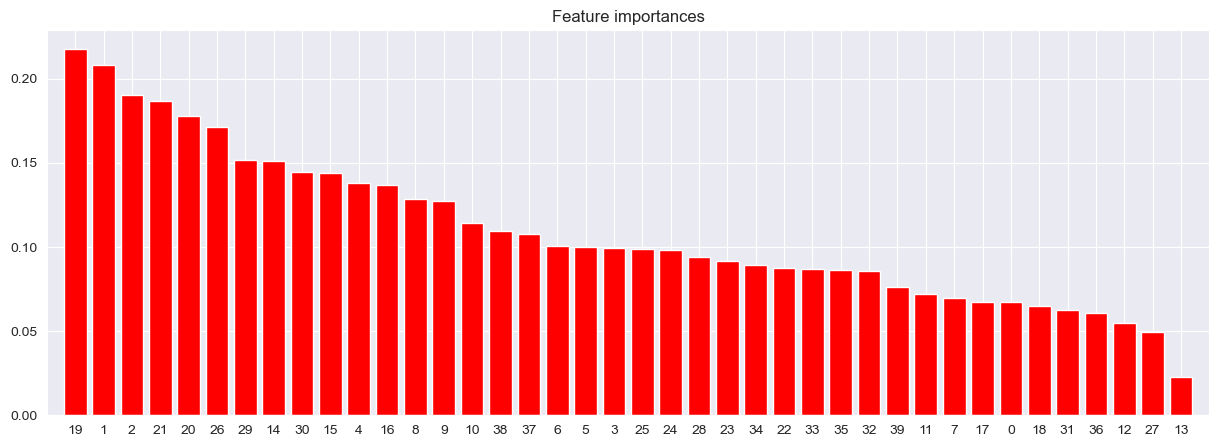

In [20]:
# feature selection using information gain
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
indices = np.argsort(importances)[::-1]

# Plotting the feature importances 
plt.figure(figsize = (15, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
         color = "r", align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Selecting the features with importance equal or greater than 0.1
feature_set2 = X.iloc[:, indices[importances >= 0.1]]

### **Classes & Functions required for building the models (ensemble methods incl.), cross validation and model evaluation (with plots)**

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, cohen_kappa_score, matthews_corrcoef, classification_report
# Function to get evaluation scores
def evaluate_model(y_test, y_pred, y_pred_proba):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average = 'weighted')
    rec = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    logloss = log_loss(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict = True)
    cr = pd.DataFrame(cr).transpose()
    cr.index = ['Candidate', 'Confirmed', 'False Positive', 'accuracy', 'macro avg', 'weighted avg']
    return acc, prec, rec, f1, logloss, kappa, mcc, cr

model_scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'Kappa', 'MCC'])

In [22]:
# Function that fits the model and returns the evaluation scores
def make_simple_model(model, x, y, model_name, df):
    model.fit(x, y)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc, prec, rec, f1, logloss, kappa, mcc, cr = evaluate_model(y_test, y_pred, y_pred_proba)
    df = df.append({'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1, 'Log Loss': logloss, 'Kappa': kappa, 'MCC': mcc}, ignore_index=True)
    return df, cr

In [23]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Class that implements the bagging ensemble algorithm for decision trees
class BaggingEnsemble:
    # Constructor
    def __init__(self, n_models):
        self.n_models = n_models
        self.models = []

    # Function to sample the dataset with replacement
    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace = True)
        return X[idxs], y[idxs]

    # Function to fit the model
    def fit(self, X, y):
        for i in range(self.n_models):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            model = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy')
            model.fit(X_sample, y_sample)
            self.models.append(model)

    # Function to predict the target
    def predict(self, row):
        predictions = [model.predict([row])[0] for model in self.models]
        return max(set(predictions), key = predictions.count)

    # Function to predict the target probabilities
    def predict_proba(self, row):
        predictions = [model.predict_proba([row])[0] for model in self.models]
        return np.mean(predictions, axis = 0)

    # Function to get the overall accuracy score for the bagging ensemble model
    def score(self, X, y):
        predictions = [self.predict(row) for row in X]
        return accuracy_score(y, predictions)

In [24]:
# Function for plotting all the metrics for all the models
def plot_metrics(metrics_list, title, x_ticks, no_of_ticks = 2, y_lim = (0, 1)):
    df_metrics = pd.DataFrame(metrics_list, columns = ['accuracy', 'precision', 'recall', 'f1', 'kappa', 'mcc'])
    sns.set_palette('cubehelix', 6)
    df_metrics.plot(kind = 'bar', figsize = (30, 12))
    for p in plt.gca().patches:
        plt.gca().annotate('{:.2%}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', fontsize = 12, color = '#000', xytext = (0, 25), textcoords = 'offset points', fontweight = 'bold', rotation = 90)
    plt.title(title, fontsize = 16, fontweight = 'bold', pad = 15)
    plt.xticks(np.arange(no_of_ticks), x_ticks, rotation = 0)
    plt.ylim(y_lim)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 11)
    plt.legend(labelcolor = '#fff', loc = 'lower right', fontsize = 12, facecolor = '#000', edgecolor = '#fff', framealpha = 0.9, fancybox = True, shadow = True, borderpad = 2)
    plt.show()

In [25]:
class CrossValidation:
    def __init__(self, model, n_folds):
        self.model = model
        self.n_folds = n_folds

    # Function that evaluates the model
    def eval_model(self, X, y):
        y_pred = self.model.predict(X)
        y_pred_proba = self.model.predict_proba(X)
        acc, prec, rec, f1, logloss, kappa, mcc, cr = evaluate_model(y, y_pred, y_pred_proba)
        return acc, prec, rec, f1, logloss, kappa, mcc, cr

    # Function that evaluates the bagging model
    def eval_ensemble(self, X, y):
        y_pred = [self.model.predict(row) for row in X]
        y_pred_proba = [self.model.predict_proba(row) for row in X]
        acc, prec, rec, f1, logloss, kappa, mcc, cr = evaluate_model(y, y_pred, y_pred_proba)
        return acc, prec, rec, f1, logloss, kappa, mcc, cr
        
    # Function that plots line plot for the train and test accuracy
    def plot_accuracy(self, train_acc, test_acc, in_ylim):
        sns.set_palette('cubehelix', 2)
        plt.figure(figsize = (10, 8))
        plt.plot(train_acc, label = 'Train Accuracy')
        plt.plot(test_acc, label = 'Test Accuracy')
        plt.title('Train and Test Accuracy', fontsize = 16, fontweight = 'bold', pad = 15)
        plt.xlabel('Folds', fontsize = 12, fontweight = 'bold')
        plt.ylabel('Accuracy', fontsize = 12, fontweight = 'bold')
        plt.xticks(np.arange(len(train_acc)))
        plt.ylim(in_ylim)
        plt.tick_params(axis = 'both', which = 'major', labelsize = 11)
        plt.legend(labelcolor = '#fff', loc = 'lower right', fontsize = 12, facecolor = '#000', edgecolor = '#fff', framealpha = 0.9, fancybox = True, shadow = True, borderpad = 2)
        plt.show()

    # Custom function for train test split
    def cust_train_test_split(self, X, y, train_size = 0.8, test_size = 0.2, random_state = 42):
        if train_size != 0.8:
            test_size = 1 - train_size
        elif test_size != 0.2:
            train_size = 1 - test_size
        np.random.seed(random_state)
        idxs = np.random.permutation(len(X))
        train_idxs = idxs[:int(train_size * len(X))]
        test_idxs = idxs[int(train_size * len(X)):]
        X_train, y_train = X.iloc[train_idxs], y.iloc[train_idxs]
        X_test, y_test = X.iloc[test_idxs], y.iloc[test_idxs]
        return X_train, X_test, y_train, y_test

    # Function that performs cross validation for bagging ensemble model
    def bag_cv(self, X, y, df):
        acc, prec, rec, f1, logloss, kappa, mcc = [], [], [], [], [], [], []
        crs = pd.DataFrame()
        for i in range(self.n_folds):
            X_train, X_test, y_train, y_test = self.cust_train_test_split(X, y, test_size = 0.3, random_state = i)
            self.model.fit(X_train.values, y_train.values)
            acc_, prec_, rec_, f1_, logloss_, kappa_, mcc_, cr_ = self.eval_ensemble(X_test.values, y_test.values)
            crs = crs.append(cr_)
            acc.append(acc_)
            prec.append(prec_)
            rec.append(rec_)
            f1.append(f1_)
            logloss.append(logloss_)
            kappa.append(kappa_)
            mcc.append(mcc_)
        crs = crs.groupby(crs.index).mean()
        df = df.append({'Model': 'CV Bagging Ensemble', 'Accuracy': np.mean(acc), 'Precision': np.mean(prec), 'Recall': np.mean(rec), 'F1 Score': np.mean(f1), 'Log Loss': np.mean(logloss), 'Kappa': np.mean(kappa), 'MCC': np.mean(mcc)}, ignore_index=True)
        return df, crs

    # Function that performs the cross validation
    def cv(self, X, y, df):
        accs, precs, recs, f1s, loglosses, kappas, mccs = [], [], [], [], [], [], []
        crs = pd.DataFrame()
        for i in range(self.n_folds):
            X_train, X_test, y_train, y_test = self.cust_train_test_split(X, y, test_size = 0.3, random_state = i)
            self.model.fit(X_train, y_train)
            acc, prec, rec, f1, logloss, kappa, mcc, cr = self.eval_model(X_test, y_test)
            crs = crs.append(cr)
            accs.append(acc)
            precs.append(prec)
            recs.append(rec)
            f1s.append(f1)
            loglosses.append(logloss)
            kappas.append(kappa)
            mccs.append(mcc)
        crs = crs.groupby(crs.index).mean()
        df = df.append({'Model': 'CV ' + self.model.__class__.__name__, 'Accuracy': np.mean(accs), 'Precision': np.mean(precs), 'Recall': np.mean(recs), 'F1 Score': np.mean(f1s), 'Log Loss': np.mean(loglosses), 'Kappa': np.mean(kappas), 'MCC': np.mean(mccs)}, ignore_index=True) 
        return df, crs

### **Classification using Different Models for Feature Set 1 (Pearson Correlation Coefficient based)**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set1, y, test_size = 0.2, random_state = 42)

In [28]:
# Training, testing and evaluating SVM model without cross-validation using feature set 1
model_scores_df, cr = make_simple_model(SVC(kernel = 'rbf', random_state = 42, gamma = .10, C = 1.0, probability = True), X_train, y_train, 'SVC', model_scores_df)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.000000,0.000000,0.000000,354.000000
Confirmed,0.000000,0.000000,0.000000,457.000000
False Positive,0.480461,1.000000,0.649070,750.000000
accuracy,0.480461,0.480461,0.480461,0.480461
macro avg,0.160154,0.333333,0.216357,1561.000000
weighted avg,0.230843,0.480461,0.311853,1561.000000


In [29]:
# Training, testing and evaluating Logistic Regression model without cross-validation using feature set 1
model_scores_df, cr = make_simple_model(LogisticRegression(), X_train, y_train, 'Logistic Regression', model_scores_df)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.350000,0.019774,0.037433,354.000000
Confirmed,0.375000,0.118162,0.179700,457.000000
False Positive,0.493916,0.920000,0.642757,750.000000
accuracy,0.481102,0.481102,0.481102,0.481102
macro avg,0.406305,0.352645,0.286630,1561.000000
weighted avg,0.426465,0.481102,0.369918,1561.000000


In [30]:
# Training, testing and evaluating KNN model without cross-validation using feature set 1
model_scores_df, cr = make_simple_model(KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2), X_train, y_train, 'KNN', model_scores_df)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.482014,0.378531,0.424051,354.000000
Confirmed,0.609127,0.671772,0.638918,457.000000
False Positive,0.777920,0.808000,0.792675,750.000000
accuracy,0.670724,0.670724,0.670724,0.670724
macro avg,0.623021,0.619435,0.618548,1561.000000
weighted avg,0.661399,0.670724,0.664065,1561.000000


In [31]:
# Training, testing and evaluating Decision Tree model without cross-validation using feature set 1
model_scores_df, cr = make_simple_model(DecisionTreeClassifier(max_depth = 10, random_state = 42, criterion = 'entropy'), X_train, y_train, 'Decision Tree', model_scores_df)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.801444,0.627119,0.703645,354.000000
Confirmed,0.751434,0.859956,0.802041,457.000000
False Positive,0.980289,0.994667,0.987426,750.000000
accuracy,0.871877,0.871877,0.871877,0.871877
macro avg,0.844389,0.827247,0.831037,1561.000000
weighted avg,0.872731,0.871877,0.868797,1561.000000


In [32]:
# Training, testing and evaluating Bagging Ensemble model without cross-validation using feature set 1
n_models = 100
ensemble = BaggingEnsemble(n_models)
ensemble.fit(X_train.values, y_train.values)
print(ensemble.score(X_test.values, y_test.values))

single_tree_acc = pd.DataFrame(columns = ['Model', 'Accuracy'])
# Evaluating each single tree
for model in ensemble.models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    single_tree_acc = single_tree_acc.append({'Model': 'Single Tree', 'Accuracy': acc}, ignore_index = True)

single_tree_acc

0.8795643818065343


,Model,Accuracy
0,Single Tree,0.862908
1,Single Tree,0.848815
2,Single Tree,0.858424
3,Single Tree,0.864190
4,Single Tree,0.855862
...,...,...
95,Single Tree,0.854580
96,Single Tree,0.870596
97,Single Tree,0.853940
98,Single Tree,0.843049


In [33]:
# Evaluating the overall bagging ensemble model
y_pred = [ensemble.predict(row) for row in X_test.values]
y_pred_proba = [ensemble.predict_proba(row) for row in X_test.values]
acc, prec, rec, f1, logloss, kappa, mcc, cr = evaluate_model(y_test, y_pred, y_pred_proba)
model_scores_df = model_scores_df.append({'Model': 'Bagging Ensemble', 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1, 'Log Loss': logloss, 'Kappa': kappa, 'MCC': mcc}, ignore_index=True)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.852000,0.601695,0.705298,354.000000
Confirmed,0.752294,0.897155,0.818363,457.000000
False Positive,0.979112,1.000000,0.989446,750.000000
accuracy,0.879564,0.879564,0.879564,0.879564
macro avg,0.861135,0.832950,0.837702,1561.000000
weighted avg,0.883882,0.879564,0.874921,1561.000000


In [34]:
# Evaluation of all models without cross-validation using feature set 1
model_scores_df

,Model,Accuracy,Precision,Recall,F1 Score,Log Loss,Kappa,MCC
0,SVC,0.480461,0.230843,0.480461,0.311853,1.048324,0.000000,0.000000
1,Logistic Regression,0.481102,0.426465,0.481102,0.369918,0.899310,0.039263,0.061129
2,KNN,0.670724,0.661399,0.670724,0.664065,1.017340,0.473428,0.474847
3,Decision Tree,0.871877,0.872731,0.871877,0.868797,0.848477,0.795801,0.798565
4,Bagging Ensemble,0.879564,0.883882,0.879564,0.874921,0.300780,0.807519,0.812641


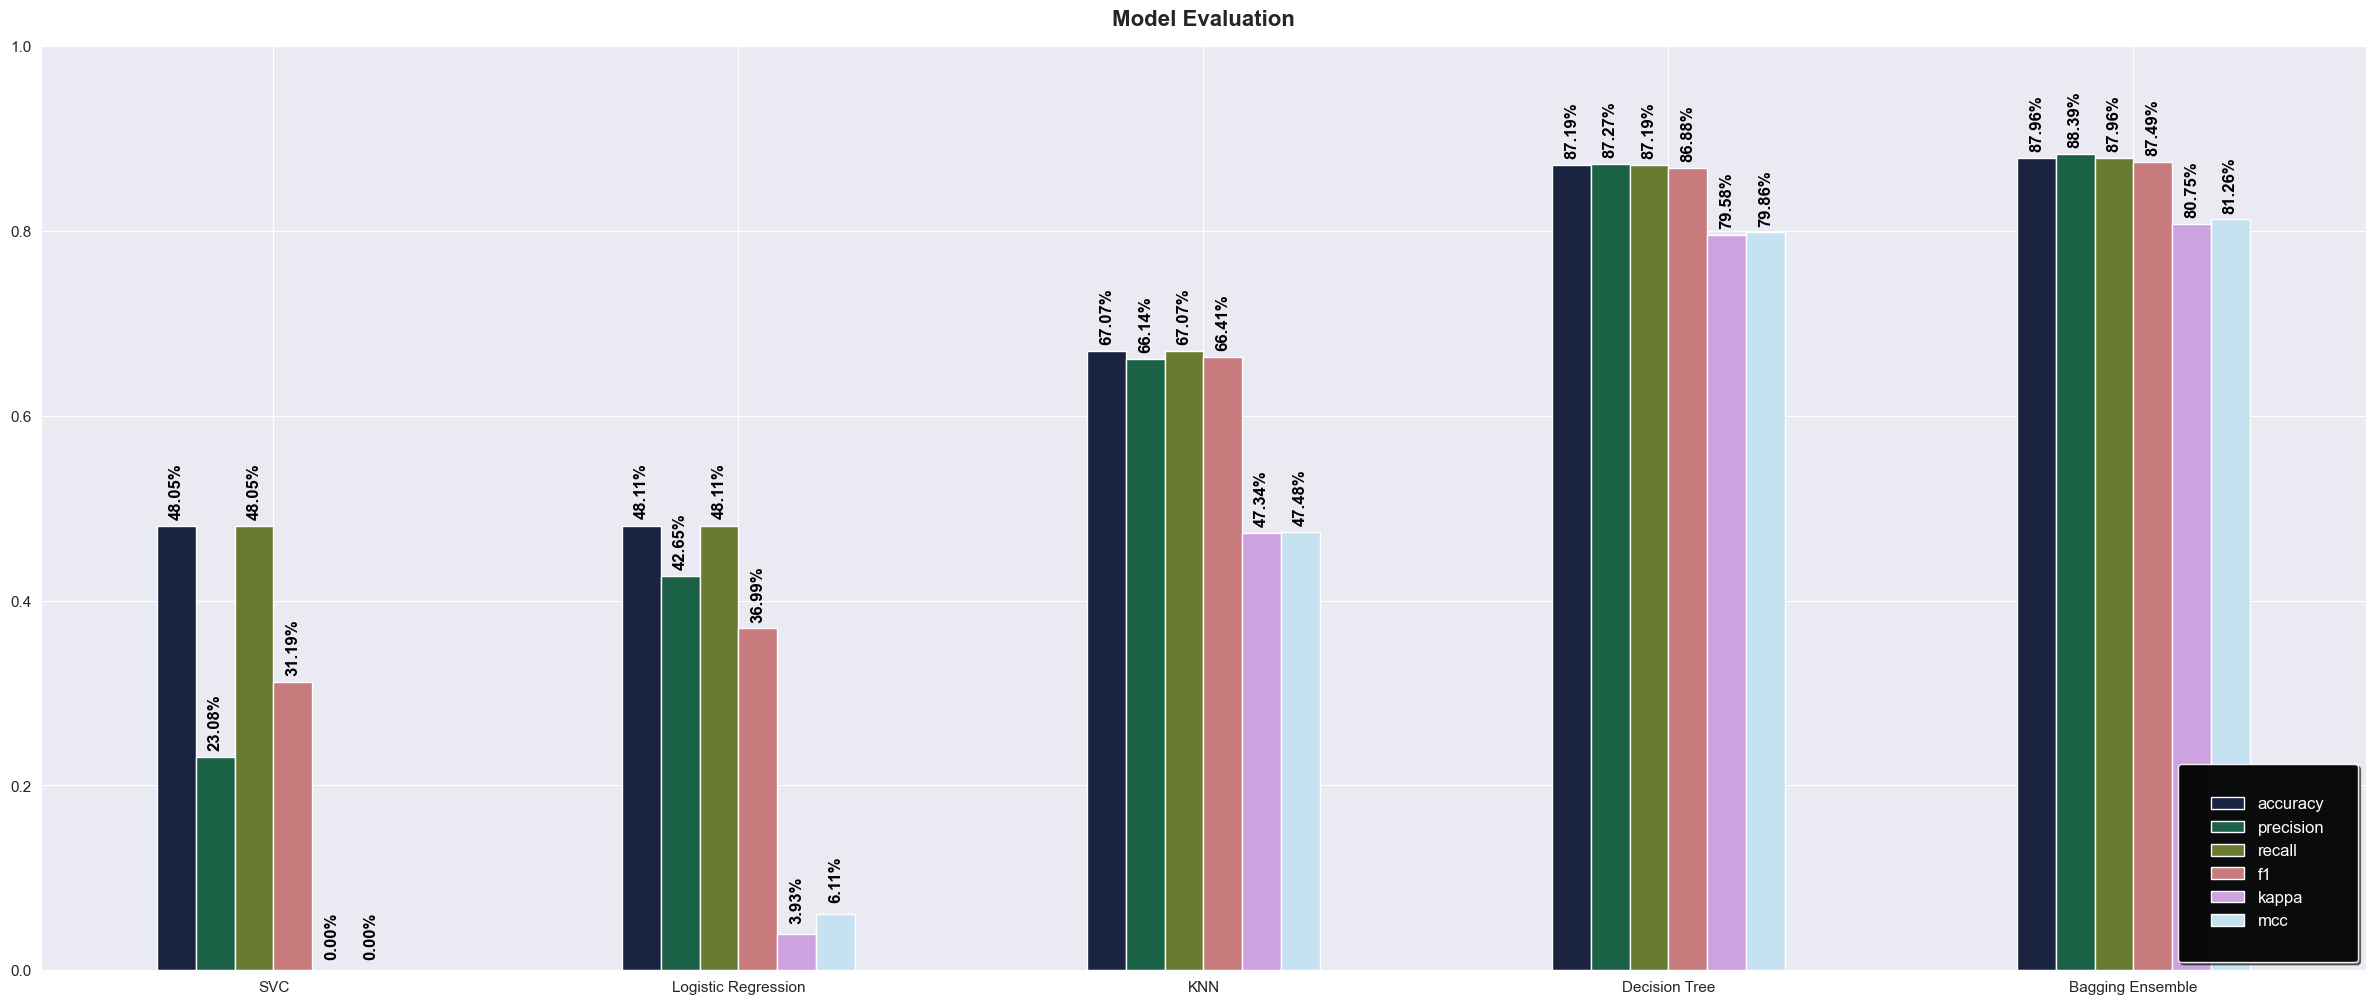

In [35]:
# Plotting all evaluated scores for all models without cross validation using feature set 1
metrics_list = model_scores_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa', 'MCC']].values.tolist()
plot_metrics(metrics_list, 'Model Evaluation', model_scores_df['Model'].values, no_of_ticks = 5)

In [36]:
# Training, testing and evaluating SVM model with cross validation using feature set 1
model_scores_df, cr = CrossValidation(SVC(kernel = 'rbf', random_state = 42, gamma = .10, C = 1.0, probability = True), 10).cv(X, y, model_scores_df)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.000000,0.000000,0.000000,535.200000
Confirmed,0.000000,0.000000,0.000000,673.900000
False Positive,0.483511,1.000000,0.651828,1131.900000
accuracy,0.483511,0.483511,0.483511,0.483511
macro avg,0.161170,0.333333,0.217276,2341.000000
weighted avg,0.233815,0.483511,0.315195,2341.000000


In [37]:
# Training, testing and evaluating Logistic Regression model with cross validation using feature set 1
model_scores_df, cr = CrossValidation(LogisticRegression(), 10).cv(feature_set1, y, model_scores_df)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.266850,0.018372,0.033026,535.200000
Confirmed,0.368029,0.122142,0.182728,673.900000
False Positive,0.499151,0.918526,0.646755,1131.900000
accuracy,0.483426,0.483426,0.483426,0.483426
macro avg,0.378010,0.353013,0.287503,2341.000000
weighted avg,0.408556,0.483426,0.372827,2341.000000


In [38]:
# Training, testing and evaluating KNN model with cross validation using feature set 1
model_scores_df, cr = CrossValidation(KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2), 10).cv(X, y, model_scores_df)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.461321,0.327302,0.382777,535.20000
Confirmed,0.577964,0.703160,0.634360,673.90000
False Positive,0.785373,0.791526,0.788395,1131.90000
accuracy,0.660060,0.660060,0.660060,0.66006
macro avg,0.608219,0.607329,0.601844,2341.00000
weighted avg,0.651704,0.660060,0.651436,2341.00000


In [39]:
# Training, testing and evaluating Decision Tree model with cross validation using feature set 1
model_scores_df, cr = CrossValidation(DecisionTreeClassifier(max_depth = 10, random_state = 42, criterion = 'entropy'), 10).cv(X, y, model_scores_df)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.786373,0.623959,0.694623,535.200000
Confirmed,0.740259,0.856837,0.793788,673.900000
False Positive,0.982446,0.984752,0.983583,1131.900000
accuracy,0.865528,0.865528,0.865528,0.865528
macro avg,0.836359,0.821849,0.823998,2341.000000
weighted avg,0.867914,0.865528,0.862954,2341.000000


In [40]:
# Training, testing and evaluating Bagging Ensemble model with cross validation using feature set 1
n_models = 100
ensemble = BaggingEnsemble(n_models)
model_scores_df, cr = CrossValidation(ensemble, 10).bag_cv(feature_set1, y, model_scores_df)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.842474,0.632208,0.722182,535.200000
Confirmed,0.761944,0.889514,0.820763,673.900000
False Positive,0.982287,0.999912,0.991019,1131.900000
accuracy,0.884152,0.884152,0.884152,0.884152
macro avg,0.862235,0.840545,0.844655,2341.000000
weighted avg,0.886885,0.884152,0.880590,2341.000000


In [41]:
# Evaluation of all models using feature set 1
model_scores_df

,Model,Accuracy,Precision,Recall,F1 Score,Log Loss,Kappa,MCC
0,SVC,0.480461,0.230843,0.480461,0.311853,1.048324,0.000000,0.000000
1,Logistic Regression,0.481102,0.426465,0.481102,0.369918,0.899310,0.039263,0.061129
2,KNN,0.670724,0.661399,0.670724,0.664065,1.017340,0.473428,0.474847
3,Decision Tree,0.871877,0.872731,0.871877,0.868797,0.848477,0.795801,0.798565
4,Bagging Ensemble,0.879564,0.883882,0.879564,0.874921,0.300780,0.807519,0.812641
5,CV SVC,0.483511,0.233815,0.483511,0.315195,1.047405,0.000000,0.000000
6,CV LogisticRegression,0.483426,0.408556,0.483426,0.372827,0.899071,0.041556,0.063193
7,CV KNeighborsClassifier,0.660060,0.651704,0.660060,0.651436,0.945371,0.457263,0.460417
8,CV DecisionTreeClassifier,0.865528,0.867914,0.865528,0.862954,1.224003,0.785866,0.788895
9,CV Bagging Ensemble,0.884152,0.886885,0.884152,0.880590,0.258742,0.814929,0.818723


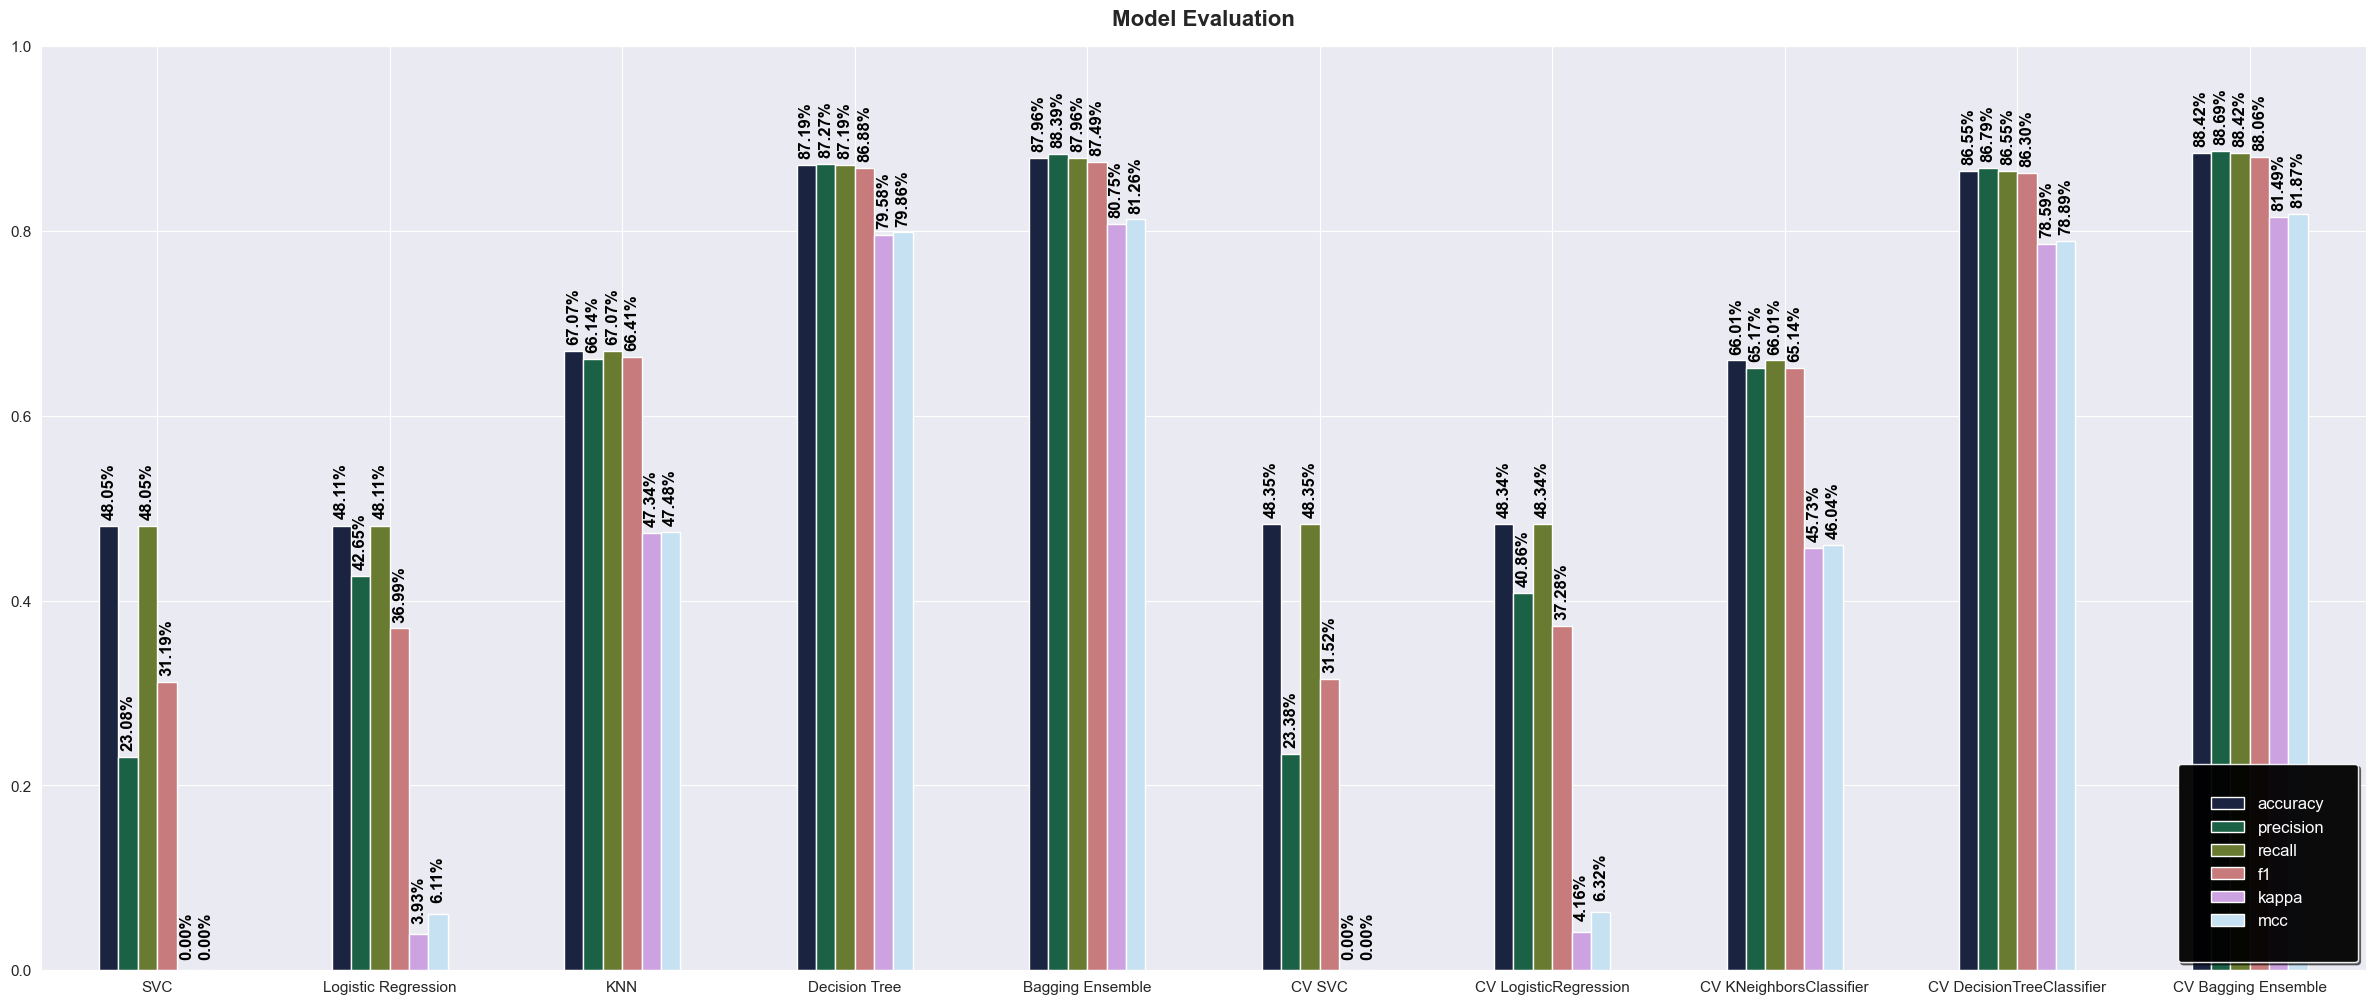

In [42]:
# Plotting all evaluated scores for all models using feature set 1
metrics_list = model_scores_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa', 'MCC']].values.tolist()
plot_metrics(metrics_list, 'Model Evaluation', model_scores_df['Model'].values, no_of_ticks = 10)

In [43]:
# Saving model scores for feature set 1
model_scores_df.to_csv('fset1_scores.csv', index = False)

### **Classification using Different Models for Feature Set 2 (Feature importances/information gain based)**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(feature_set2, y, test_size = 0.2, random_state = 42)
model_scores_df_2 = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'Kappa', 'MCC'])

In [45]:
# Training, testing and evaluating SVM model without cross-validation using feature set 2
model_scores_df_2, cr = make_simple_model(SVC(kernel = 'rbf', random_state = 42, gamma = .10, C = 1.0, probability = True), X_train, y_train, 'SVC', model_scores_df_2)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.000000,0.000000,0.000000,354.000000
Confirmed,0.750000,0.019694,0.038380,457.000000
False Positive,0.484183,1.000000,0.652458,750.000000
accuracy,0.486227,0.486227,0.486227,0.486227
macro avg,0.411394,0.339898,0.230279,1561.000000
weighted avg,0.452202,0.486227,0.324717,1561.000000


In [46]:
# Training, testing and evaluating Logistic Regression model without cross-validation using feature set 2
model_scores_df_2, cr = make_simple_model(LogisticRegression(), X_train, y_train, 'Logistic Regression', model_scores_df_2)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.276596,0.036723,0.064838,354.000000
Confirmed,0.601202,0.656455,0.627615,457.000000
False Positive,0.646305,0.874667,0.743343,750.000000
accuracy,0.620756,0.620756,0.620756,0.620756
macro avg,0.508035,0.522615,0.478599,1561.000000
weighted avg,0.549259,0.620756,0.555592,1561.000000


In [47]:
# Training, testing and evaluating KNN model without cross-validation using feature set 2
model_scores_df_2, cr = make_simple_model(KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2), X_train, y_train, 'KNN', model_scores_df_2)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.406250,0.183616,0.252918,354.000000
Confirmed,0.592668,0.636761,0.613924,457.000000
False Positive,0.709890,0.861333,0.778313,750.000000
accuracy,0.641896,0.641896,0.641896,0.641896
macro avg,0.569603,0.560570,0.548385,1561.000000
weighted avg,0.606713,0.641896,0.611039,1561.000000


In [48]:
# Training, testing and evaluating Decision Tree model without cross-validation using feature set 2
model_scores_df_2, cr = make_simple_model(DecisionTreeClassifier(max_depth = 10, random_state = 42, criterion = 'entropy'), X_train, y_train, 'Decision Tree', model_scores_df_2)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.701031,0.576271,0.632558,354.000000
Confirmed,0.761252,0.851204,0.803719,457.000000
False Positive,0.938076,0.949333,0.943671,750.000000
accuracy,0.836003,0.836003,0.836003,0.836003
macro avg,0.800120,0.792269,0.793316,1561.000000
weighted avg,0.832553,0.836003,0.832145,1561.000000


In [49]:
# Training, testing and evaluating Bagging Ensemble model without cross-validation using feature set 2
n_models = 100
ensemble = BaggingEnsemble(n_models)
ensemble.fit(X_train.values, y_train.values)
print(ensemble.score(X_test.values, y_test.values))

single_tree_acc = pd.DataFrame(columns = ['Model', 'Accuracy'])
# Evaluating each single tree
for model in ensemble.models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    single_tree_acc = single_tree_acc.append({'Model': 'Single Tree', 'Accuracy': acc}, ignore_index = True)

single_tree_acc

0.846252402306214


,Model,Accuracy
0,Single Tree,0.806534
1,Single Tree,0.818706
2,Single Tree,0.814222
3,Single Tree,0.797566
4,Single Tree,0.809097
...,...,...
95,Single Tree,0.819347
96,Single Tree,0.801409
97,Single Tree,0.819987
98,Single Tree,0.812940


In [50]:
# Evaluating the overall bagging ensemble model
y_pred = [ensemble.predict(row) for row in X_test.values]
y_pred_proba = [ensemble.predict_proba(row) for row in X_test.values]
acc, prec, rec, f1, logloss, kappa, mcc, cr = evaluate_model(y_test, y_pred, y_pred_proba)
model_scores_df_2 = model_scores_df_2.append({'Model': 'Bagging Ensemble', 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1, 'Log Loss': logloss, 'Kappa': kappa, 'MCC': mcc}, ignore_index=True)
# Printing the classification report for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.732342,0.556497,0.632424,354.000000
Confirmed,0.748603,0.879650,0.808853,457.000000
False Positive,0.956291,0.962667,0.959468,750.000000
accuracy,0.846252,0.846252,0.846252,0.846252
macro avg,0.812412,0.799605,0.800248,1561.000000
weighted avg,0.844702,0.846252,0.841208,1561.000000


In [51]:
# Evaluation of all models without cross-validation using feature set 2
model_scores_df_2

,Model,Accuracy,Precision,Recall,F1 Score,Log Loss,Kappa,MCC
0,SVC,0.486227,0.452202,0.486227,0.324717,1.025027,0.013836,0.073409
1,Logistic Regression,0.620756,0.549259,0.620756,0.555592,0.896084,0.354125,0.379856
2,KNN,0.641896,0.606713,0.641896,0.611039,0.998441,0.407682,0.417779
3,Decision Tree,0.836003,0.832553,0.836003,0.832145,1.248805,0.738972,0.740682
4,Bagging Ensemble,0.846252,0.844702,0.846252,0.841208,0.383047,0.755111,0.758542


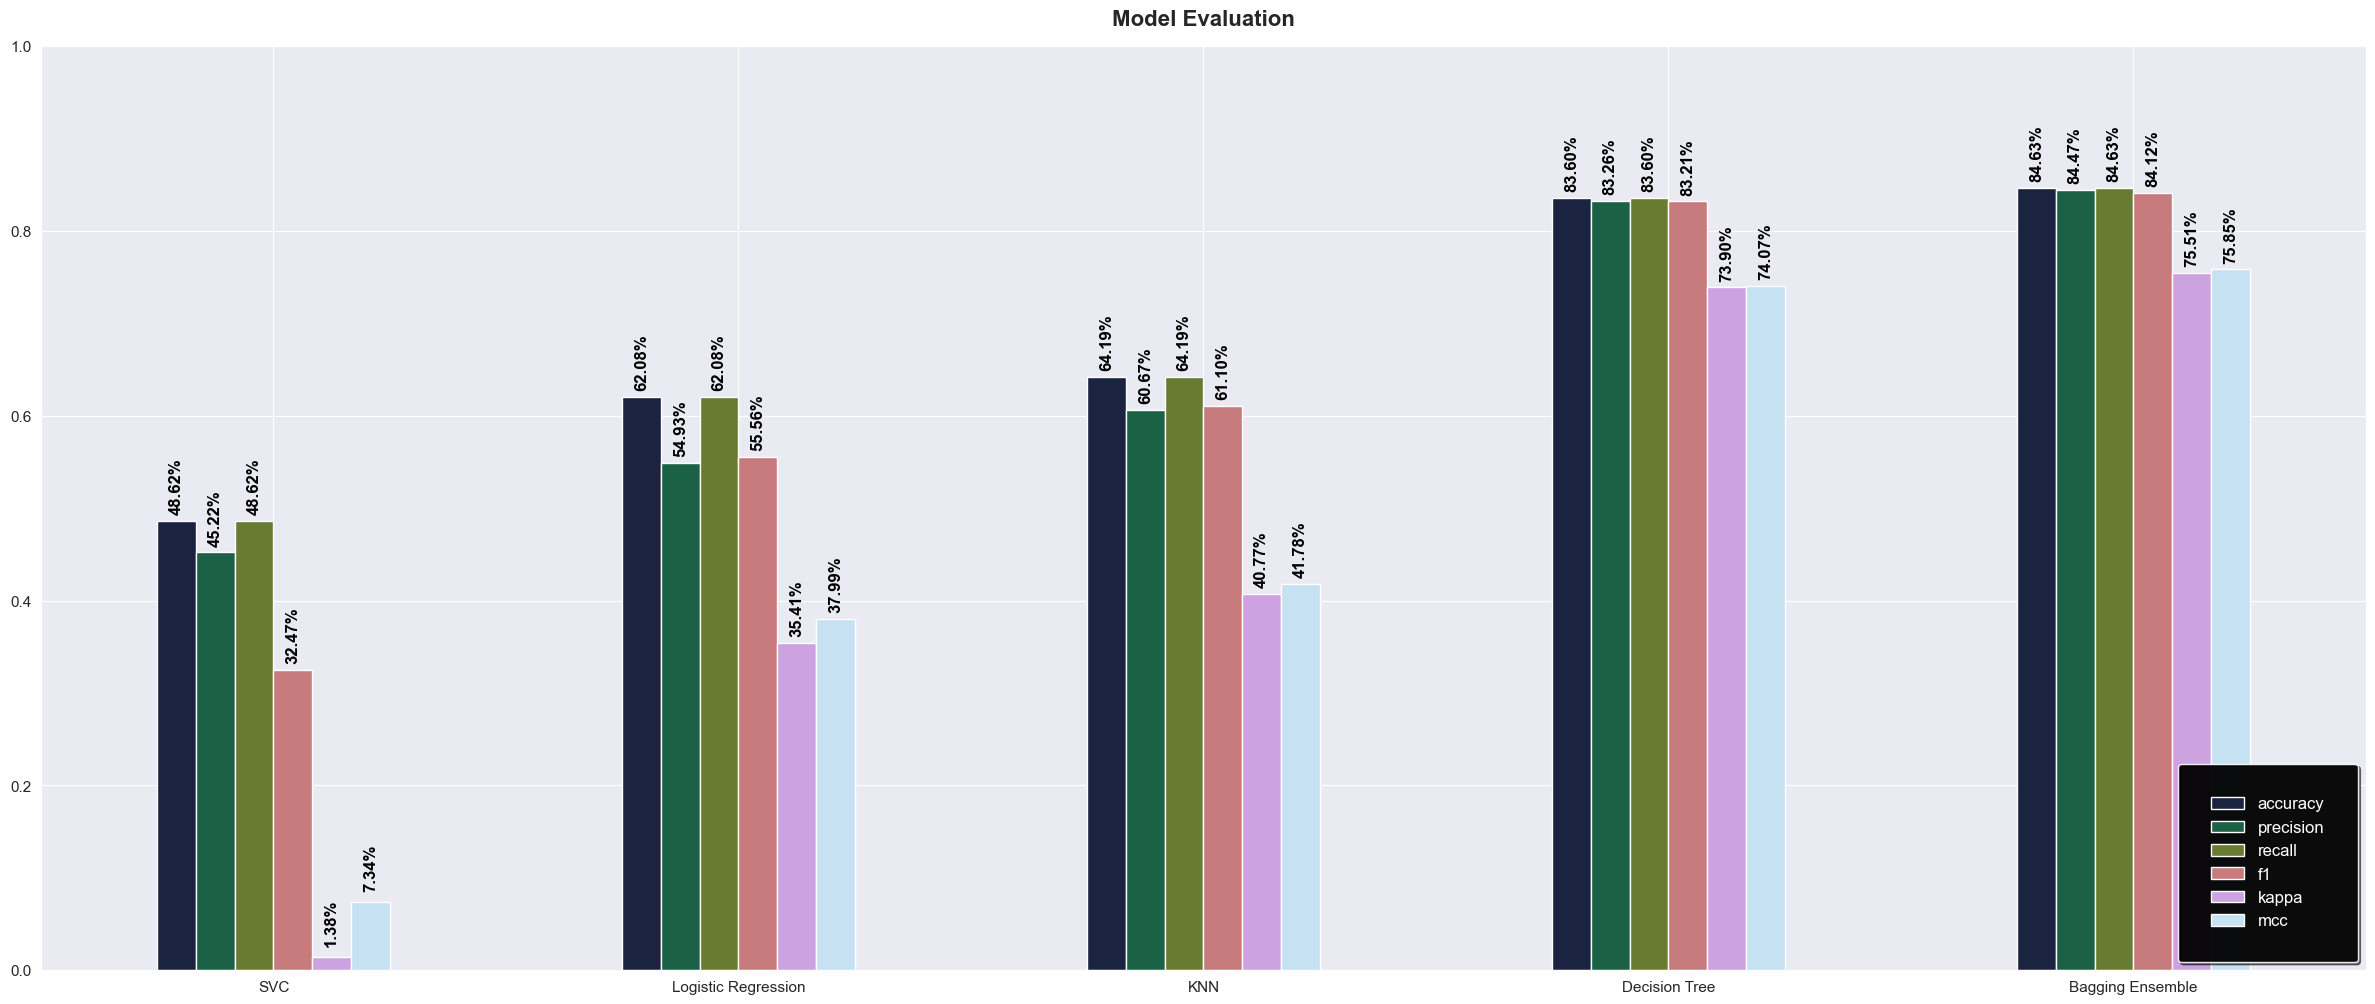

In [52]:
# Plotting all evaluated scores for all models without cross validation using feature set 2
metrics_list = model_scores_df_2[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa', 'MCC']].values.tolist()
plot_metrics(metrics_list, 'Model Evaluation', model_scores_df_2['Model'].values, no_of_ticks = 5)

In [53]:
# Training, testing and evaluating SVM model with cross validation using feature set 2
model_scores_df_2, cr = CrossValidation(SVC(kernel = 'rbf', random_state = 42, gamma = .10, C = 1.0, probability = True), 10).cv(X, y, model_scores_df_2)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.000000,0.000000,0.000000,535.200000
Confirmed,0.000000,0.000000,0.000000,673.900000
False Positive,0.483511,1.000000,0.651828,1131.900000
accuracy,0.483511,0.483511,0.483511,0.483511
macro avg,0.161170,0.333333,0.217276,2341.000000
weighted avg,0.233815,0.483511,0.315195,2341.000000


In [54]:
# Training, testing and evaluating Logistic Regression model with cross validation using feature set 2
model_scores_df_2, cr = CrossValidation(LogisticRegression(), 10).cv(feature_set2, y, model_scores_df_2)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.228796,0.027141,0.047619,535.200000
Confirmed,0.582642,0.662329,0.619594,673.900000
False Positive,0.651071,0.871192,0.745030,1131.900000
accuracy,0.617941,0.617941,0.617941,0.617941
macro avg,0.487503,0.520220,0.470748,2341.000000
weighted avg,0.534922,0.617941,0.549432,2341.000000


In [55]:
# Training, testing and evaluating KNN model with cross validation using feature set 2
model_scores_df_2, cr = CrossValidation(KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2), 10).cv(X, y, model_scores_df_2)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.461321,0.327302,0.382777,535.20000
Confirmed,0.577964,0.703160,0.634360,673.90000
False Positive,0.785373,0.791526,0.788395,1131.90000
accuracy,0.660060,0.660060,0.660060,0.66006
macro avg,0.608219,0.607329,0.601844,2341.00000
weighted avg,0.651704,0.660060,0.651436,2341.00000


In [56]:
# Training, testing and evaluating Decision Tree model with cross validation using feature set 2
model_scores_df_2, cr = CrossValidation(DecisionTreeClassifier(max_depth = 10, random_state = 42, criterion = 'entropy'), 10).cv(X, y, model_scores_df_2)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.786373,0.623959,0.694623,535.200000
Confirmed,0.740259,0.856837,0.793788,673.900000
False Positive,0.982446,0.984752,0.983583,1131.900000
accuracy,0.865528,0.865528,0.865528,0.865528
macro avg,0.836359,0.821849,0.823998,2341.000000
weighted avg,0.867914,0.865528,0.862954,2341.000000


In [57]:
# Training, testing and evaluating Bagging Ensemble model with cross validation using feature set 2
n_models = 100
ensemble = BaggingEnsemble(n_models)
model_scores_df_2, cr = CrossValidation(ensemble, 10).bag_cv(feature_set2, y, model_scores_df_2)
# Printing the mean of all classification reports for understanding the model performance for each class
cr

,precision,recall,f1-score,support
Candidate,0.735709,0.578559,0.647580,535.20000
Confirmed,0.742761,0.870868,0.801675,673.90000
False Positive,0.964964,0.963413,0.964177,1131.90000
accuracy,0.848740,0.848740,0.848740,0.84874
macro avg,0.814478,0.804280,0.804477,2341.00000
weighted avg,0.848581,0.848740,0.844994,2341.00000


In [58]:
# Evaluation of all models with cross validation using feature set 2
model_scores_df_2

,Model,Accuracy,Precision,Recall,F1 Score,Log Loss,Kappa,MCC
0,SVC,0.486227,0.452202,0.486227,0.324717,1.025027,0.013836,0.073409
1,Logistic Regression,0.620756,0.549259,0.620756,0.555592,0.896084,0.354125,0.379856
2,KNN,0.641896,0.606713,0.641896,0.611039,0.998441,0.407682,0.417779
3,Decision Tree,0.836003,0.832553,0.836003,0.832145,1.248805,0.738972,0.740682
4,Bagging Ensemble,0.846252,0.844702,0.846252,0.841208,0.383047,0.755111,0.758542
5,CV SVC,0.483511,0.233815,0.483511,0.315195,1.047405,0.000000,0.000000
6,CV LogisticRegression,0.617941,0.534922,0.617941,0.549432,0.918421,0.349301,0.375645
7,CV KNeighborsClassifier,0.660060,0.651704,0.660060,0.651436,0.945371,0.457263,0.460417
8,CV DecisionTreeClassifier,0.865528,0.867914,0.865528,0.862954,1.224003,0.785866,0.788895
9,CV Bagging Ensemble,0.848740,0.848581,0.848740,0.844994,0.332491,0.759270,0.762278


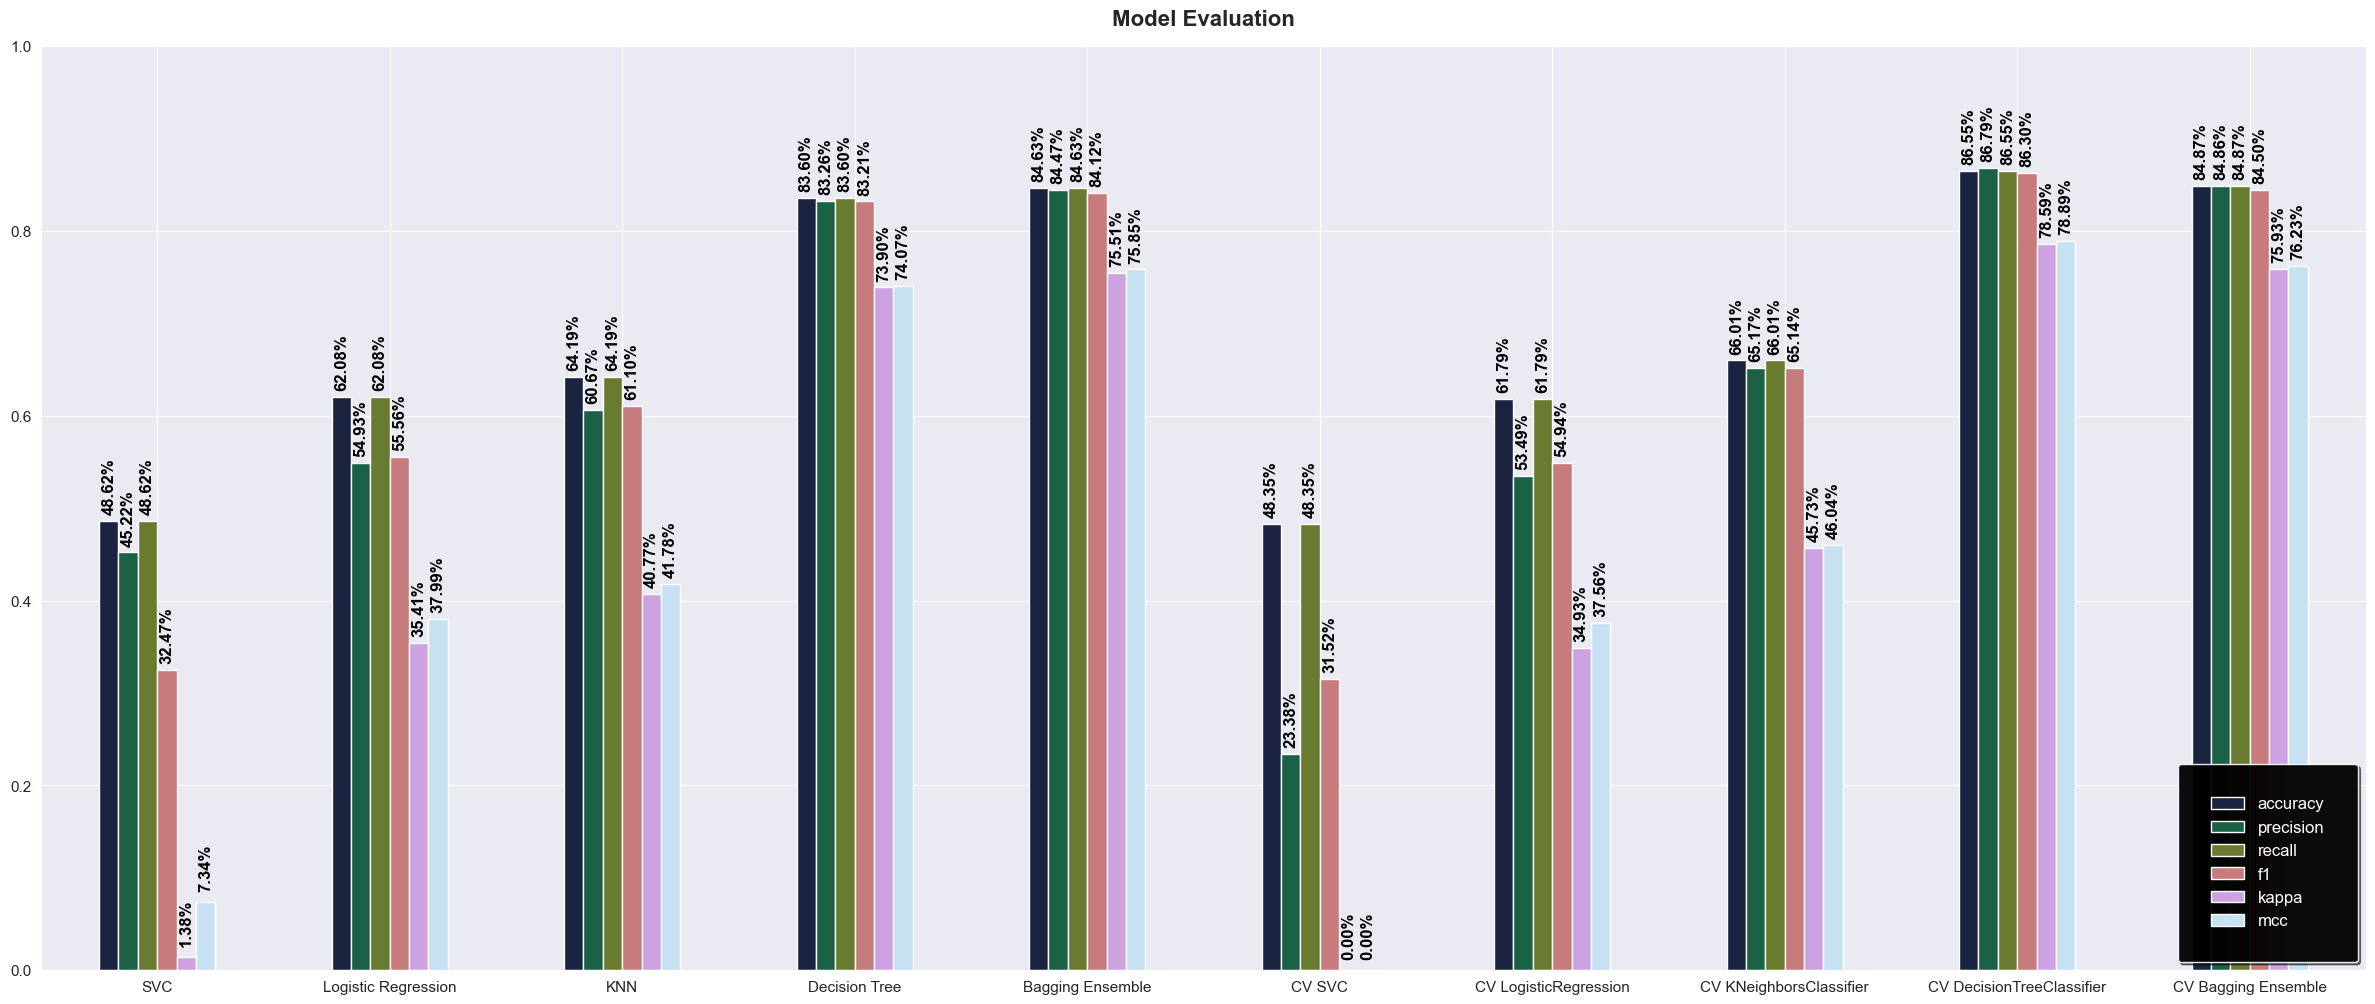

In [59]:
# Plotting all evaluated scores for all models with cross validation using feature set 2
metrics_list = model_scores_df_2[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa', 'MCC']].values.tolist()
plot_metrics(metrics_list, 'Model Evaluation', model_scores_df_2['Model'].values, no_of_ticks = 10)

In [60]:
# Saving model scores for feature set 2
model_scores_df_2.to_csv('fset2_scores.csv', index = False)